In [173]:
import pandas as pd

In [174]:
palac = pd.read_csv("/content/palac-saski")

In [ ]:
palac

In [176]:
#1.1

palac["created_at"] = [dzien.replace("Mon", "Poniedziałek").replace("Tue", "Wtorek").replace("Wed", "Środa").replace("Thu", "Czwartek").replace("Fri", "Piątek").replace("Sat", "Sobota").replace("Sun", "Niedziela") for dzien in palac["created_at"]]

In [177]:
#1.2

palac["user_created_at"] = [miesiac.replace("Jan", "01").replace("Feb", "02").replace("Mar", "03").replace("Apr", "04").replace("May", "05").replace("Jun", "06").replace("Jul", "07").replace("Aug", "08").replace("Sep", "09").replace("Oct", "10").replace("Nov", "11").replace("Dec", "12") for miesiac in palac["user_created_at"]]

In [ ]:
#1.3

[elem for elem in palac["tweet_url"]]

In [ ]:
#1.4

urls = [elem for elem in palac["urls"] if elem == elem]
print(urls)

In [ ]:
#1.5

media = [elem for elem in palac["media"] if elem == elem]
print(media)

In [ ]:
#1.6

palac["text_without_stopwords"] = ""

stopwords = ["ach","aj","albo","bardzo","bez","bo","być","ci","cię","ciebie","co","czy","daleko","dla","dlaczego","dlatego","do","dobrze","dokąd","dość","dużo","dwa","dwaj","dwie","dwoje","dziś","dzisiaj","gdyby","gdzie","go","ich","ile","im","inny","ja","ją","jak","jakby","jaki","je","jeden","jedna","jedno","jego","jej","jemu","jeśli","jest","jestem","jeżeli","już","każdy","kiedy","kierunku","kto","ku","lub","ma","mają","mam","mi","mną","mnie","moi","mój","moja","moje","może","mu","my","na","nam","nami","nas","nasi","nasz","nasza","nasze","natychmiast","nią","nic","nich","nie","niego","niej","niemu","nigdy","nim","nimi","niż","obok","od","około","on","ona","one","oni","ono","owszem","po","pod","ponieważ","przed","przedtem","są","sam","sama","się","skąd","tak","taki","tam","ten","to","tobą","tobie","tu","tutaj","twoi","twój","twoja","twoje","ty","wam","wami","was","wasi","wasz","wasza","wasze","we","więc","wszystko","wtedy","wy","żaden","zawsze","że","a","aby","acz","aczkolwiek","ale","ależ","aż","bardziej","bowiem","by","byli","bynajmniej","był","była","było","były","będzie","będą","cali","cała","cały","cokolwiek","coś","czasami","czasem","czemu","czyli","gdy","gdyż","gdziekolwiek","gdzieś","i","inna","inne","innych","iż","jakaś","jakichś","jakie","jakiś","jakiż","jakkolwiek","jako","jakoś","jednak","jednakże","jeszcze","kilka","kimś","ktokolwiek","ktoś","która","które","którego","której","który","których","którym","którzy","lat","lecz","mimo","między","mogą","moim","możliwe","można","musi","nad","naszego","naszych","natomiast","nawet","no","o","oraz","pan","pana","pani","podczas","pomimo","ponad","powinien","powinna","powinni","powinno","poza","prawie","przecież","przede","przez","przy","roku","również","sobie","sobą","sposób","swoje","ta","taka","takie","także","te","tego","tej","teraz","też","totobą","toteż","trzeba","twoim","twym","tych","tylko","tym","u","w","według","wiele","wielu","więcej","wszyscy","wszystkich","wszystkie","wszystkim","właśnie","z","za","zapewne","zeznowu","znów","został","żadna","żadne","żadnych","żeby"]

for i, wiersz in palac.iterrows():
    tekst = wiersz["text"].split(" ")
    non_stopwords = [wyraz for wyraz in tekst if wyraz.lower() not in stopwords]
    oczyszczony_tekst = " ".join(non_stopwords)
    palac.at[i, "text_without_stopwords"] = oczyszczony_tekst

palac['text_without_stopwords']

In [ ]:
#2.1

sorted = palac.sort_values("favorite_count", ascending=False).head(5)
print(sorted["text"])

In [ ]:
#2.2

retweet = palac.sort_values("retweet_count", ascending=False).head(5)
print(retweet["text"])

In [ ]:
#2.3

palac[palac["possibly_sensitive"] == False]["text"]

In [ ]:
#2.4

data_utworzenia = palac["user_created_at"].min()

user = palac[palac["user_created_at"] == data_utworzenia]["user_id"].values[0]

palac[palac["user_id"] == user]["text"]

In [ ]:
#2.5

followers = palac["user_followers_count"].max()

user = palac[palac["user_followers_count"] == followers]["user_name"].values[0]

palac.loc[palac["user_name"] == user, "text"]

In [ ]:
#2.6

palac[palac["user_verified"] == True]["user_name"]

In [ ]:
#2.7

data = [elem for elem in palac["created_at"]]

dni = {'Poniedziałek': 0, 'Wtorek': 0, 'Środa': 0, 'Czwartek': 0, 'Piątek': 0, 'Sobota': 0, 'Niedziela': 0}

for i in data:
    elems = i.split(' ')
    dni[elems[0]] += 1

dzien_max = max(dni, key=dni.get)
print("Dzień tygodnia, w którym tweety były publikowane najczęściej:", dzien_max, "(", dni[dzien_max], ")")

In [ ]:
!pip install spacy -U 
!python -m spacy download pl_core_news_sm
import spacy
nlp = spacy.load("pl_core_news_sm")

In [ ]:
#3.1

palac["persons"] = ""
for i, wiersz in palac.iterrows():
  if isinstance(wiersz["text"], str):
    text = wiersz["text"]
    osoby = nlp(text)
    persons = [ent.text for ent in osoby.ents if ent.label_ == "persName"]
    palac.at[i, "persons"] = persons

In [191]:
#3.2

palac["places"] = ""
for i, wiersz in palac.iterrows():
  if isinstance(wiersz["text"], str):
    text = wiersz["text"]
    miejsca = nlp(text)
    places = [ent.text for ent in miejsca.ents if ent.label_ == "placeName"]
    palac.at[i, "places"] = places

In [192]:
#3.3

palac["organizations"] = ""
for i, wiersz in palac.iterrows():
  if isinstance(wiersz["text"], str):
    text = wiersz["text"]
    organizacje = nlp(text)
    organizations = [ent.text for ent in organizacje.ents if ent.label_ == "orgName"]
    palac.at[i, "organizations"] = organizations

In [193]:
import matplotlib.pyplot as plt
import numpy as np

In [194]:
#4.1 Wykorzystując pakiet matplotlib wykonaj
# wykres ilustrujący liczbę tweetów per dzień tygodnia. 
# Liczbę tweetów per dzień tygodnia zlicz na podstawie wystąpień nazw dni tygodnia w kolumnie created_at

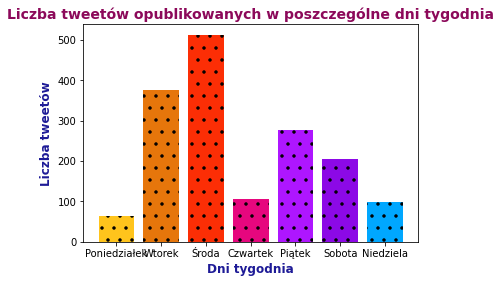

In [195]:
#4.1

data = [elem for elem in palac["created_at"]]

poniedzialek = 0
wtorek = 0
sroda = 0
czwartek = 0
piatek = 0
sobota = 0
niedziela = 0

for elem in data:
    if elem.find("Poniedziałek") != -1:
        poniedzialek +=1
    elif elem.find("Wtorek") != -1:
        wtorek +=1
    elif elem.find("Środa") != -1:
        sroda +=1
    elif elem.find("Czwartek") != -1:
        czwartek +=1
    elif elem.find("Piątek") != -1:
        piatek +=1
    elif elem.find("Sobota") != -1:
        sobota +=1
    elif elem.find("Niedziela") != -1:
        niedziela +=1

x = ['Poniedziałek', 'Wtorek', 'Środa', 'Czwartek', 'Piątek', 'Sobota', 'Niedziela']
y = [poniedzialek, wtorek, sroda, czwartek, piatek, sobota, niedziela]

plt.bar(x, y)
plt.title('Liczba tweetów opublikowanych w poszczególne dni tygodnia', fontsize = 14, color = '#8C095A', fontweight = 'bold')
plt.xlabel('Dni tygodnia', fontsize = 12, color = '#1E1B97', fontweight = 'bold')
plt.ylabel('Liczba tweetów', fontsize = 12, color = '#1E1B97', fontweight = 'bold')
kolory = ['#FFC41C', '#E6760B', '#FC2E05', '#E6077E', '#AE16FF', '#8C09E6', '#00A7FF']
plt.bar(x, y, color = kolory, hatch = '.')
plt.show()

In [196]:
palac

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords,persons,places,organizations
0,NaN,Środa Jul 21 07:28:18 +0000 2021,NaN,NaN,NaN,0,1417748252947095553,NaN,NaN,NaN,...,Rafał Lesiecki,eR17eL,27220,NaN,NaN,False,Skoro potrafili uszyć maseczek zdefraudowali 2...,[],[],[]
1,NaN,Środa Jul 21 07:29:25 +0000 2021,NaN,NaN,NaN,8,1417748534649102337,bbudka,1.417746e+18,118739645.0,...,AG-to-be #SilniRazem,WWnioski,23931,NaN,NaN,False,@bbudka Jakieś pałace pewnością odbuduja wybud...,[Saski],[],[@bbudka Jakieś]
2,NaN,Środa Jul 21 07:38:09 +0000 2021,NaN,NaN,NaN,0,1417750730593742848,NaN,NaN,NaN,...,Chino ♋️,Chino4711,30143,NaN,NaN,False,Pałac Saski żadnym szczególnie cennym polskim ...,[],"[polskim, Niemców, Rosjan]",[]
3,NaN,Środa Jul 21 07:39:07 +0000 2021,NaN,NaN,NaN,0,1417750974891020288,NaN,NaN,NaN,...,Iwonna#POzwycięstwo🇪🇺,Iwonna14,70684,NaN,NaN,False,Pałac Saski zbudowali XVIII w. sascy architekc...,"[Pöppelmann, Jauch, Augusta II, Augusta III]","[sascy, rosyjski, Skwarcow]","[Biura Szyfrów, PiS]"
4,NaN,Środa Jul 21 07:27:17 +0000 2021,NaN,NaN,NaN,0,1417747996012384262,NaN,NaN,NaN,...,MałgNakonieczny,manakoniec,682202,NaN,NaN,False,odtworzyć Pałac Saski?\nTak wyglądała Synagoga...,[Synagoga Stara],[Wilnie],[IIWŚ]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1633,NaN,Poniedziałek Jul 12 20:45:19 +0000 2021,NaN,NaN,https://gospodarka.dziennik.pl/news/artykuly/8...,0,1414687338865860610,NaN,NaN,NaN,...,Henryk Sankowski,HenrykSankowski,6943,NaN,NaN,False,sprawdzić 😉\n\nhttps://t.co/Jf77oWfbw5,[],[],[]
1634,NaN,Wtorek Jul 13 08:44:46 +0000 2021,NaN,NaN,"https://warszawa.wyborcza.pl/warszawa/7,54420,...",71,1414868391450628096,NaN,NaN,NaN,...,Bertold Kittel,Bertold_K,21917,NaN,NaN,False,Odbudowa Pałacu Saskiego. Wysokość pensji zarz...,[],[],[Odbudowa Pałacu Saskiego]
1635,NaN,Poniedziałek Jul 12 22:02:36 +0000 2021,NaN,NaN,https://twitter.com/RMF24pl/status/14145703607...,8,1414706787303972864,NaN,NaN,NaN,...,Michał Protaziuk,michalprotaziuk,32019,NaN,http://Onet.pl,False,"Myślę, ze pierwszą uwagę zwrocić strone spółki...",[],[],[]
1636,NaN,Wtorek Jul 13 06:44:02 +0000 2021,NaN,NaN,NaN,0,1414838009657282565,NaN,NaN,NaN,...,julita,julital96,106995,NaN,NaN,False,"@AJakubowska1 różnica,że stadion wybudowany 20...",[],[Baranowie],[]
